# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-04-08 20:50:18 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, znver2)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


## Visualización de ciclos con... ¡tortugas!

Imaginemos que tenemos una tortuga en el origen de un plano cartesiano que tiene una pluma (de escribir) pegada, la cual puede poner sobre el papel o bien levantar, y que esta tortuga entiende sólo cuatro instrucciones:
* camina hacia adelante un número $d$ de unidades de distancia,
* gira $\theta$ grados,
* levanta la pluma del papel y
* baja la pluma sobre el papel.

Si le pedimos que camine hacia adelante mientras tiene la pluma abajo (i.e. sobre el papel), dibujará una línea recta, mientras que, si le pedimos que camine cuando tiene la pluma arriba (i.e. levantada), no dibujará nada. La tortuga tampoco dibujará nada si le pedimos que gire, pues asumiremos que, aún con la pluma abajo, la marca es tan pequeña que no se alcanza a ver (o que es "de dimensión cero"). 

Observa que, con las cuatro instrucciones anteriores (y la cooperación de la tortuga, por supuesto) **podríamos dibujar cualquier figura bidimensional compuesta únicamente por líneas rectas**. En serio, **piénsalo**.

### Dibujando líneas con tortugas en Julia

Afortunadamente, existe un programa que hace exactamente lo que acabamos de describir. Está incluido dentro del paquete [`ThinkJulia`](https://github.com/BenLauwens/ThinkJulia.jl), creado como recurso didáctico del libro [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles) de Ben Lauwens. Instalemos e importemos este paquete:

In [3]:
#Importamos el paquete "Pkg" para poder instalar paquetes.
using Pkg                                                  

#Luego, instalamos el paquete "ThinkJulia".
Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

     Cloning git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IrrationalConstants ─────── v0.1.1
   Installed Showoff ─────────────────── v0.3.2
   Installed x265_jll ────────────────── v3.5.0+0
   Installed FFMPEG ──────────────────── v0.3.0
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed Adapt ───────────────────── v3.6.1
   Installed ColorTypes ──────────────── v0.9.1
   Installed libfdk_aac_jll ──────────── v2.0.2+0
   Installed Plots ───────────────────── v1.0.14
   Installed OffsetArrays ────────────── v1.12.9
   Installed GeometryTypes ───────────── v0.8.5
   Installed ImageCore ───────────────── v0.8.22
   Installed TikzPictures ────────────── v3.4.2
   Installed Graphite2_jll ───────────── v1.3.14+0
   Installed libass_jll ──────────────── v0.15.1+0
   Installed Pixman_jll ───────────

In [4]:
using ThinkJulia # Importamos el paquete "ThinkJulia".

#=NOTA: Después de instalar el paquete "ThinkJulia" localmente en tu computadora,
podrás importarlo las veces que quieras sin tener que volverlo a instalar; por ende,
recomendamos comentar la celda de código anterior después de la instalación inicial,
pues ya no será necesaria más adelante.=#

[ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
[ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].


En la siguiente celda, usamos la función `Turtle` para inicializar nuestra tortuga en el origen del plano cartesiano y luego mostramos un ejemplo con las cuatro instrucciones que podemos darle. Como existe un caracter [`Unicode`](https://es.wikipedia.org/wiki/Unicode) de tortuga que podemos usar para nombrar variables con Julia, lo usaremos para definir a nuestra tortuga, por pura diversión; este caracter se obtiene escribiendo `\:turtle:` en una celda de código de Julia y auto completando con la tecla `TAB`.

Ejecuta la siguiente celda, experimenta cambiando el valor de distancia `d` y comentando alguna o varias líneas del bloque `begin`, y observa cómo cambia el dibujo que haces con la tortuga. ¿Hacia dónde mira la tortuga al inicio? ¿La convención de grados que sigue la tortuga es igual a la convención matemática usual en el plano cartesiano?

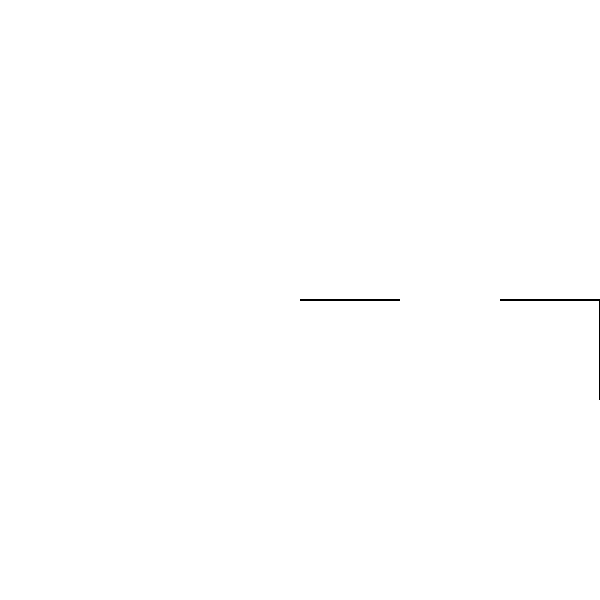

In [5]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 100

@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
    forward(🐢,d)
    penup(🐢)
    forward(🐢,d)
    pendown(🐢)
    forward(🐢,d)
    turn(🐢, 90)
    forward(🐢,d)
end

#=NOTA: '@svg' toma las instrucciones dentro del bloque 'begin' y genera un "gráfico
vectorizado escalable" (o svg, por sus siglas en inglés) con ellas, que luego Jupyter
nos muestra.=#

**Ejercicio** Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia cada una con 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)

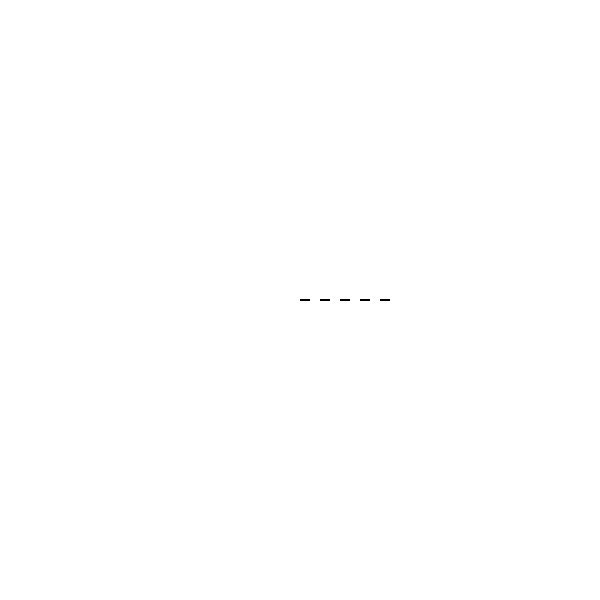

In [9]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 10 # Establecemos 10 unidades de distancia.

@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
    forward(🐢,d) # Hacemos que nuestra tortuga camine para comenzar nuestra línea punteada.
    penup(🐢) # Le decimos que comience con la pluma arriba. 
    forward(🐢,d) # Le decimos que avance nuevamente.
    pendown(🐢) # Le decimos que tenga la pluma abajo para que trace nuestra primera línea negra de 10 unidades. 
    forward(🐢,d) # Le decimos a nuestra tortuga que avance nuevamente.
    penup(🐢) # Solo que esta vez le decimos que levante la pluma para dejar una distancia de 10 unidades entre nuestra primera línea negra con respecto a la segunda.
    forward(🐢,d) # Repetimos el proceso anterior estrablecido en las 4 líneas de código anteriores para realizar 4 líneas negras más para hacer nuestra linea punteada.
    pendown(🐢) # Aquí comienza nuestra segunda línea negra. 
    forward(🐢,d)
    penup(🐢)
    forward(🐢,d)
    pendown(🐢) # Aquí comienza nuestra tercera línea negra. 
    forward(🐢,d)
    penup(🐢)
    forward(🐢,d)
    pendown(🐢) # Aquí comienza nuestra cuarta línea negra. 
    forward(🐢,d)
    penup(🐢)
    forward(🐢,d) # Aquí comienza nuestra quinta línea negra y termina nuestra línea punteada. 
    pendown(🐢)
end

**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo **`for`** o **`while`**.

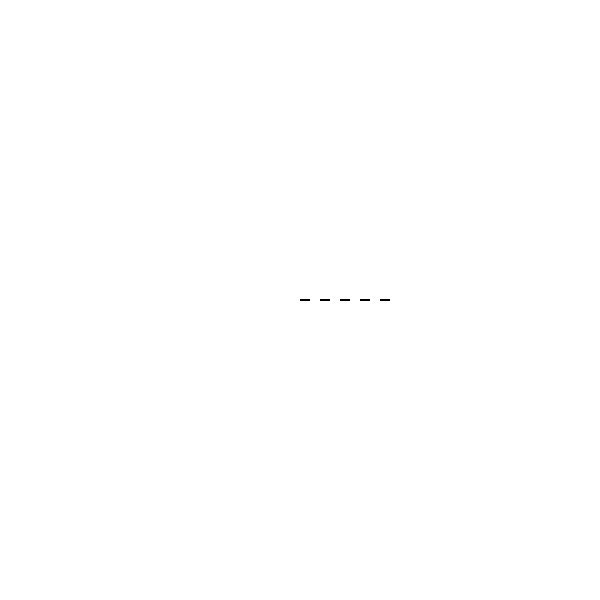

In [30]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 10 # Establecemos 10 unidades de distancia.

N = [1,2,3,4,5] # Hacemos un arreglo para establecer el número de líneas negras que queremos (5).

 @svg begin #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
        for i in N # Iniciamos un ciclo for que corra sobre N. 
         forward(🐢,d) # Hacemos que nuestra tortuga camine.
         penup(🐢) # Le decimos que comience con la pluma arriba para que genere la distancia de 10 unidades entre nuestras líneas negras. 
         forward(🐢,d) # Le decimos que avance nuevamente.
         pendown(🐢) # Le decimos que tenga la pluma abajo para que trace una línea negra de 10 unidades. 
        end # Terminamos el ciclo for
      end 






**Ejercicio** Haz un programa que tome tres parámetros `n`, `d1` y `d2` (los cuales puedes definir como variables en la misma celda) y dibuje `n` líneas de longitud `d1` con una distancia de separación `d2` entre ellas utilizando un ciclo **`for`** o **`while`**.

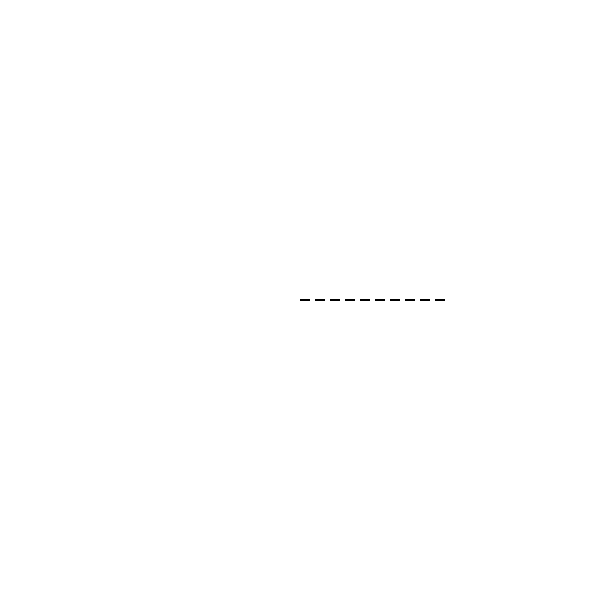

In [53]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

function programa(n,d1,d2) # Declaramos nuestra función a la que llamaremos "programa", cuyas variables son n (número de líneas), d1 (longitud de las líneas) y d2 (separación entre las líneas).
  @svg begin #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
        while n > 0 # Iniciamos un ciclo while que corra mientras se cumpla nuestra condición. 
         forward(🐢,d1) # Hacemos que nuestra tortuga camine una distancia d1, la cual es la longitud de nuestras lineas.
         penup(🐢) # Le decimos que comience con la pluma arriba. 
         forward(🐢,d2) # Le decimos que avance nuevamente una distancia d2 que será la separación entre nuestras líneas.
         pendown(🐢) # Le decimos que tenga la pluma abajo. 
         n -= 1 #Modificamos el valor de 'n', ¡de forma que eventualmente la condición deje de cumplirse!
        end # Terminamos el ciclo while
      end # Dejamos de darle instrucciones a nuestra tortuga
end # Terminamos la función

# programa(1,10,20) # Probamos varias veces nuestra función para verificar que se realice correctamente. 
# programa(2,10,20)
# programa(3,10,30)
# programa(4,10,40)
# programa(5,20,10)
programa(10,10,5)

**Ejercicio** Haz un programa que dibuje un triángulo equilátero de lado `d`.

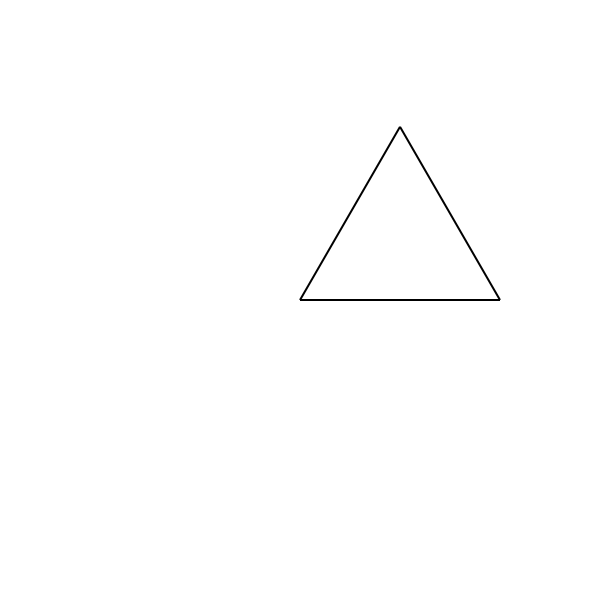

In [66]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

N = [1,2,3] # Haremos un arreglo para el número de lados del triángulo.

function triangulo(d) # Declaramos nuestra función a la que llamaremos "triangulo", cuya variable será d (tamaño de cada lado). 

@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
      for i in N # Hacemos un ciclo for que corra sobre nuestro arreglo N. 
      forward(🐢,d) # Le decimos a la tortuga que avance una distancia d. 
      turn(🐢, -120) # Le decimos a la tortuga que gire a -120 grados (para que se cumpla que cada ángulo de nuestro triángulo equilatero sea de 60° y que no este de cabeza). 
      end # Terminamos el ciclo for.
     end # Dejamos de darle instrucciones a nuestra tortuga.
end # Terminamos la función. 

# triangulo(10) # Probamos varias veces nuestra función para verificar que se realice correctamente. 
# triangulo(20)
# triangulo(30)
# triangulo(50)
# triangulo(100)
  triangulo(200)

**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros `n` y `d` y dibuje un polígono regular de `n` lados de longitud `d` utilizando un ciclo **`for`** o **`while`**.

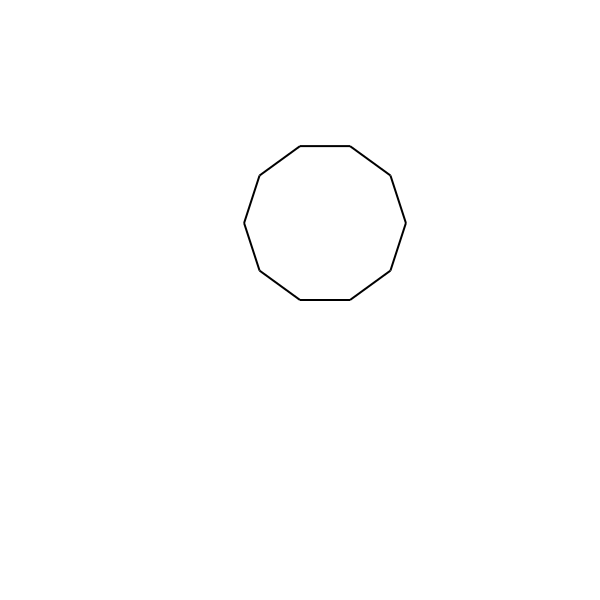

In [74]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

function poligono(n,d) # Declaramos nuestra función a la que llamaremos "poligono", cuyas variables serán n (número de lados) y d (tamaño de cada lado). 

@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
      for i in 1:n # Hacemos un ciclo for que corra sobre el rango de 1 a n. 
      forward(🐢,d) # Le decimos a la tortuga que avance una distancia d. 
      turn(🐢, -360/n) # Le decimos a la tortuga que gire a -360/n grados.
      end # Terminamos el ciclo for.
     end # Dejamos de darle instrucciones a nuestra tortuga.
end # Terminamos la función. 

# poligono(3, 200) # Probamos varias veces nuestra función para verificar que se realice correctamente.
# poligono(4, 150)
# poligono(5, 100)
# poligono(6, 50)
# poligono(8, 20)
 poligono(10, 50)

### Tortugas y fractales

Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga:

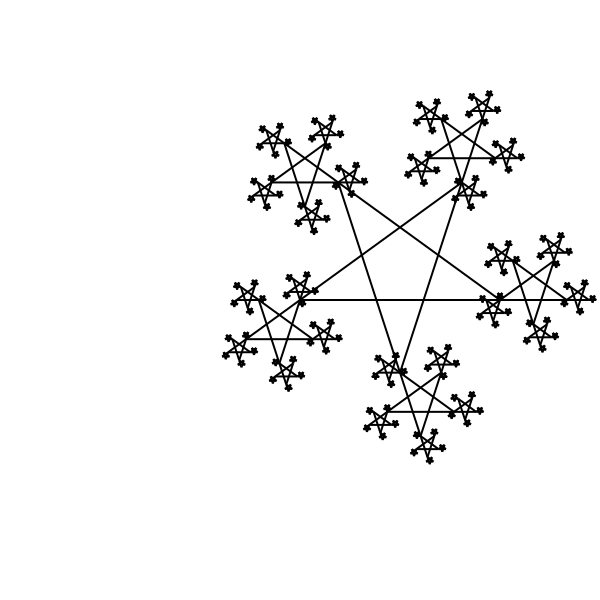

In [75]:
function estrella(tort,dist)      #Sintáxis compacta.
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 200

@svg estrella(🐢,d)

**Ejercicio** Crea un fractal **original** con un ciclo recursivo.

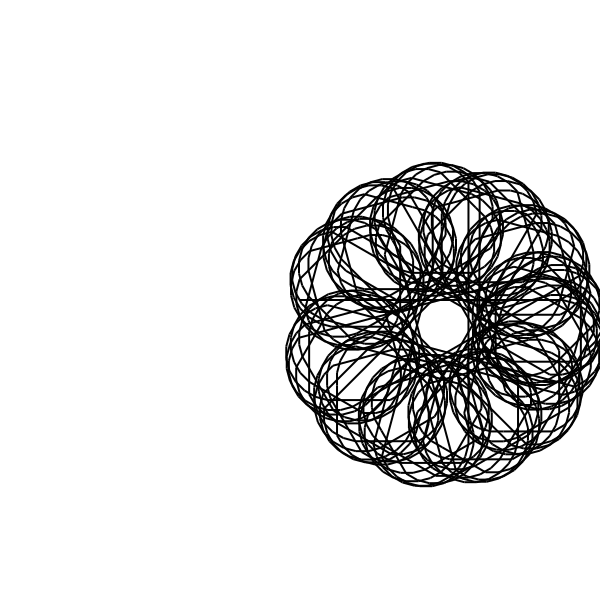

In [101]:
function fractal(t,b)  # Copiamos el código de la celda anterior y nombramos a nuestra función como "fractal".
    if b <= 2 # Cambiamos el nombre de la variable y su valor.
        return
    else
    # Renombramos varibles y cambiamos valores (los valores se cambiaron aleatoriamente en varias ocasiones hasta obtener un fractal).
        for i in 1:12
            forward(t,5*b)
            fractal(t,b/4)
            turn(t,15)
        end
    end
end # Terminamos nuestra función.

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 40 # Asignamos un valor a d.

@svg fractal(🐢,d) # Creamos nuestro fractal. 

### Dato curioso

El _software_ del paquete `ThinkJulia` que acabamos de utilizar está basado en la biblioteca [`turtle`](https://docs.python.org/3/library/turtle.html) de Python la cual, a su vez, está basada en el lenguaje de programación educativo [`Logo`](https://en.wikipedia.org/wiki/Logo_(programming_language)) creado en 1967.

## Resumen

Los **ciclos** nos permiten _repetir_ procesos _hasta que_ una condición particular se satisfaga. En Julia, existen tres tipos de ciclos:
* **`while`**, que se ejecutan _mientras_ una condición se cumpla (o, equivalentemente, mientras no se deje de cumplir);
* **`for`**, que se ejecutan _por_ cada elemento de un arreglo, y por cada iteración se le asigna el valor del elemento en turno del arreglo a una variable conocida como _iterador_, que puede ser usada dentro del mismo ciclo;
* **recursivos**, que se crean mediante _funciones que se llaman a sí mismas_.

Se pueden crear ciclos _infinitos_ del primer y tercer tipo. Esto puede evitarse en un ciclo **`while`** asegurándose de que las instrucciones dentro del ciclo eventualmente hagan que la condición que determina su ejecución se evalúe a `false`. Para el caso de un ciclo **recursivo**, dentro de la definición de la función recursiva, _antes de que se llame a sí misma_, se debe colocar una declaración condicional de tal forma que uno de los caminos _posibles_ termine el ciclo.

También es posible iterar ciclos **`for`** sobre _rangos_, creados con la sintáxis $\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{b}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$, donde $\color{green}{\text{a}}$ es el punto de partida, $\color{green}{\text{b}}$ es la diferencia entre elementos adyacentes y $\color{green}{\text{c}}$ acota a los valores que se pueden incluir en el rango. Los rangos pueden ser convertidos a arreglos con `collect` y, junto con los ciclos **`for`**, sirven para definir arreglos _por comprensión_.


## Recursos complementarios
* Manual de Julia de [ciclos](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops).
* Video [Programming Loops vs Recursion](https://www.youtube.com/watch?v=HXNhEYqFo0o) del canal de YouTube [Computerphile](https://www.youtube.com/@Computerphile).
* Sección "Turtles" del libro digital [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles) de Ben Lauwens.